# MIE1624 Assignment1: Data Import and Brief Analysis

In [1]:
import numpy as np              
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('clean_kaggle_data.csv',low_memory=False)
data.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data['Q25'].describe() #Salary statistic analysis, with mean and standard deviation

count      15391.000000
mean       49116.009356
std        98090.207788
min         1000.000000
25%         2000.000000
50%        15000.000000
75%        60000.000000
max      1000000.000000
Name: Q25, dtype: float64

# Q1. Key Features Plots

In [4]:
#sns.pairplot(data, kind='reg')

Text(0.5, 1.0, 'Education Level vs Salary')

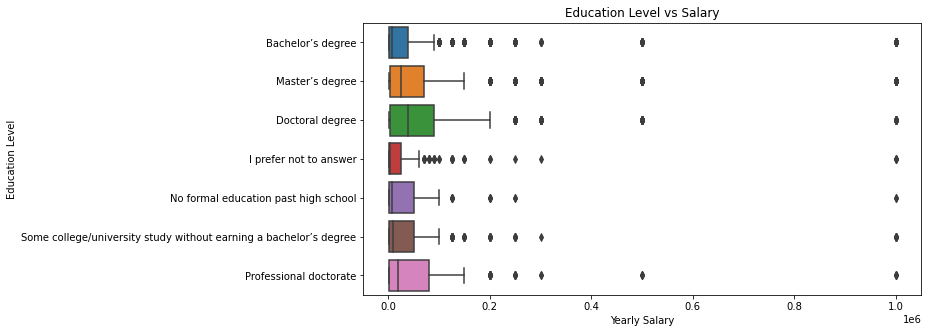

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Q25', y ='Q4', data =data)
#plt.xticks(rotation = -25)
plt.ylabel('Education Level')
plt.xlabel('Yearly Salary')
plt.title('Education Level vs Salary')

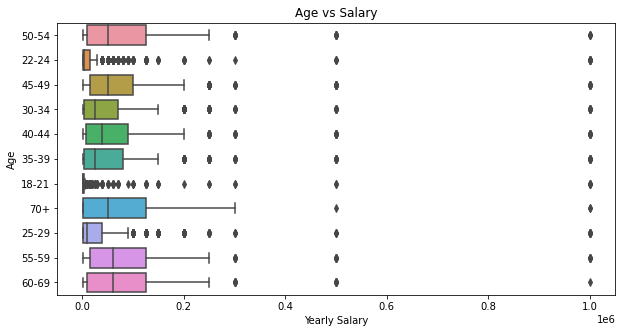

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Q25', y ='Q1', data=data)
plt.ylabel('Age')
plt.xlabel('Yearly Salary')
plt.title('Age vs Salary')
plt.show()

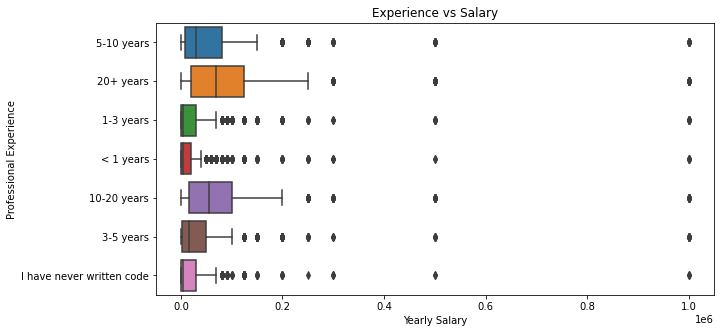

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Q6', x='Q25', data=data)
plt.ylabel('Professional Experience')
plt.xlabel('Yearly Salary')
plt.title('Experience vs Salary')
plt.show()

# Q2. T-test on Women and Men

In [8]:
women = data[data.Q2 == 'Woman']
men = data[data.Q2 == 'Man']

In [9]:
women['Q25'].describe() #Descriptive statictics for women's salary 

count       2482.000000
mean       34816.881547
std        72017.347888
min         1000.000000
25%         1000.000000
50%         7500.000000
75%        50000.000000
max      1000000.000000
Name: Q25, dtype: float64

Text(0.5, 1.0, 'Histogram for Women Salary')

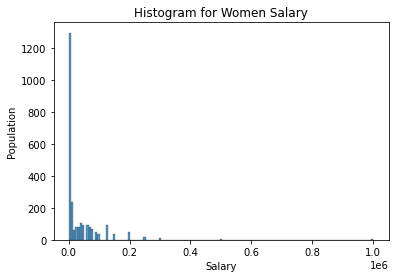

In [10]:
sns.histplot(data=data, x=women['Q25'])
plt.xlabel('Salary')
plt.ylabel('Population')
plt.title('Histogram for Women Salary')

In [11]:
men['Q25'].describe() #Descriptive statictics for men's salary 

count      12642.000000
mean       51193.600696
std        99979.274378
min         1000.000000
25%         2000.000000
50%        20000.000000
75%        60000.000000
max      1000000.000000
Name: Q25, dtype: float64

Text(0.5, 1.0, 'Histogram for Men Salary')

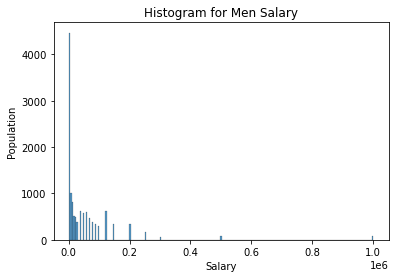

In [12]:
sns.histplot(data=data, x=men['Q25'])
plt.xlabel('Salary')
plt.ylabel('Population')
plt.title('Histogram for Men Salary')

In [13]:
#Ratio of larger variance to smaller variance is 1.92, which is less than 4
#We can assume the population variance are equal
#Reference: www.statology.org/two-sample-t-test-python/
print(np.var(men['Q25'])/np.var(women['Q25']))

1.9279082913559324


In [14]:
stats.ttest_ind(a=men['Q25'], b=women['Q25'], equal_var=True)
# H。: mu1=mu2 (two population means are equal)
#T-test statistic is 7.7741, p-value is 8.0888
#Under 95% CI, p-value is greater than 0.05, we fail to reject the null hypothesis
#Conclision: there is no siginificant difference between the means of these two groups

Ttest_indResult(statistic=7.774059663603156, pvalue=8.088812859676161e-15)

Bootstrap:

In [15]:
np.random.seed(123) #Set randomness stable for each time running the code

#Define a boostrap function for taking out samples from original data and return the mean of samples
def boots(sample):
    resample = np.random.choice(sample, size=len(sample))
    m = np.mean(resample)
    return m

#Bootstrap for women group
w_bmean = []
for i in range(1000):
    wm = boots(women['Q25'])
    w_bmean.append(wm)
    
#Bootstrap for men group
m_bmean = []
for i in range(1000):
    mm = boots(men['Q25'])
    m_bmean.append(mm)

Text(0.5, 1.0, 'Boostrapped Distribution for Men and Women')

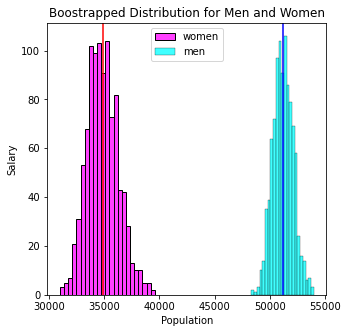

In [16]:
plt.figure(figsize=(5,5))
sns.histplot(data=w_bmean, label='women', color = 'magenta')
sns.histplot(data=m_bmean,label = 'men', color ='cyan')
plt.axvline(x=np.mean(w_bmean), color='red') #mean line for women group
plt.axvline(x=np.mean(m_bmean), color='blue') #mean line for men group
plt.legend()
plt.ylabel('Salary')
plt.xlabel('Population')
plt.title('Boostrapped Distribution for Men and Women')

Text(0.5, 1.0, 'Difference between Men and Women Salary')

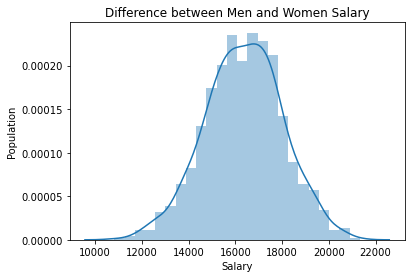

In [17]:
#Plot distribution of difference in means
meanofmen = np.array(m_bmean) #transfer list to array for difference calculation
meanofwomen = np.array(w_bmean)

sns.distplot(x = meanofmen-meanofwomen)
plt.xlabel('Salary')
plt.ylabel('Population')
plt.title('Difference between Men and Women Salary')

In [18]:
#Two sample t-test on bootstrapped data
print('The variance of boostrapped women group is ',np.var(w_bmean))
print('The variance of boostrapped men group is ',np.var(m_bmean))
print('Ratio is ', np.var(w_bmean)/np.var(m_bmean))  #Same as above, less than 4

The variance of boostrapped women group is  2007613.6900585096
The variance of boostrapped men group is  840363.5464039193
Ratio is  2.3889823620378143


In [19]:
stats.ttest_ind(a=w_bmean, b=m_bmean, equal_var=True)

# H。: mu1=mu2 (two population means are equal)
#Given p value is less than 0.05, we reject the null hypothesis.
#Conclision: the mean values of these two groups are not equal.

Ttest_indResult(statistic=-306.4455839103176, pvalue=0.0)

# Q3. ANOVA on Education Level

In [20]:
data['Q4'].unique() #To check the education level uniqueness

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer', 'No formal education past high school',
       'Some college/university study without earning a bachelor’s degree',
       'Professional doctorate'], dtype=object)

In [21]:
bach = data[data.Q4 == 'Bachelor’s degree']
mas = data[data.Q4 == 'Master’s degree']
doc = data[data.Q4 == 'Doctoral degree']

In [22]:
#Descriptive statictics for Bachelor's salary 
bach['Q25'].describe()

count       4777.000000
mean       35578.291815
std        89382.060777
min         1000.000000
25%         1000.000000
50%         7500.000000
75%        40000.000000
max      1000000.000000
Name: Q25, dtype: float64

Text(0.5, 1.0, 'Histogram for Bachelor Salary')

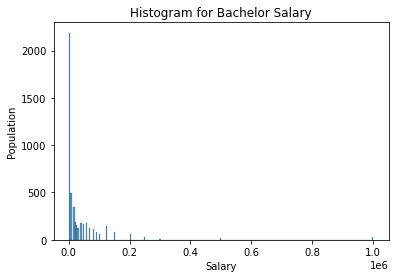

In [23]:
sns.histplot(data=data, x=bach['Q25'])
plt.xlabel('Salary')
plt.ylabel('Population')
plt.title('Histogram for Bachelor Salary')

In [24]:
#Descriptive statictics for Master's salary 
mas['Q25'].describe()

count       6799.000000
mean       52706.868657
std        90928.786678
min         1000.000000
25%         3000.000000
50%        25000.000000
75%        70000.000000
max      1000000.000000
Name: Q25, dtype: float64

Text(0.5, 1.0, 'Histogram for Master Salary')

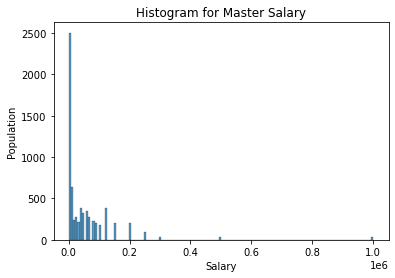

In [25]:
sns.histplot(data=data, x=mas['Q25'])
plt.xlabel('Salary')
plt.ylabel('Population')
plt.title('Histogram for Master Salary')

In [26]:
#Descriptive statictics for Doctoral salary 
doc['Q25'].describe()

count       2217.000000
mean       70641.181777
std       117160.947589
min         1000.000000
25%         4000.000000
50%        40000.000000
75%        90000.000000
max      1000000.000000
Name: Q25, dtype: float64

Text(0.5, 1.0, 'Histogram for Doctoral Salary')

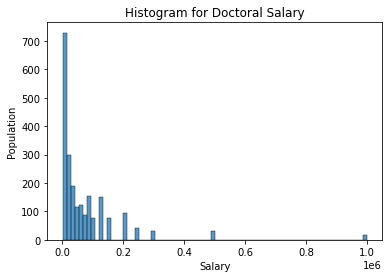

In [27]:
sns.histplot(data=data, x=doc['Q25'])
plt.xlabel('Salary')
plt.ylabel('Population')
plt.title('Histogram for Doctoral Salary')

In [28]:
#ANOVA
stats.f_oneway(bach['Q25'],mas['Q25'],doc['Q25'])

# H。: mu1=mu2=mu3 (three population means are equal)
#Given F-statistic of 109.7578 and p-value of 5.1077, p-value is greater than 0.05, we fail to reject the null hypotheses.
#Conclision: there is no siginificant difference between the means of three group

F_onewayResult(statistic=109.75776160573479, pvalue=5.107696325253651e-48)

Bootstrap:

In [29]:
#Using the 'boots' function defined before, for randomly select the samples out from three groups
#Then create 1000 means for each group

#Bootstrap for bachelor group
b_mean = []
for i in range(1000):
    bm = boots(bach['Q25'])
    b_mean.append(bm)
    
#Bootstrap for master group
m_mean = []
for i in range(1000):
    mm = boots(mas['Q25'])
    m_mean.append(mm)
    
#Bootstrap for doctor group
d_mean = []
for i in range(1000):
    dm = boots(doc['Q25'])
    d_mean.append(dm)

Text(0.5, 1.0, 'Boostrapped Distribution for Three Degrees Group')

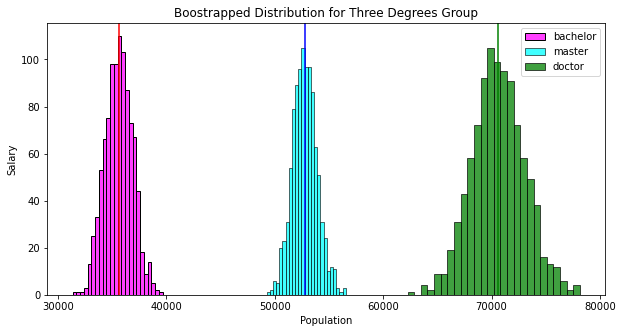

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(data=b_mean, label='bachelor', color = 'magenta')
sns.histplot(data=m_mean,label = 'master', color ='cyan')
sns.histplot(data=d_mean,label = 'doctor', color ='green')
plt.axvline(x=np.mean(b_mean), color='red') #mean line for bachelor group
plt.axvline(x=np.mean(m_mean), color='blue') #mean line for master group
plt.axvline(x=np.mean(d_mean), color='green') #mean line for doctor group
plt.legend()
plt.ylabel('Salary')
plt.xlabel('Population')
plt.title('Boostrapped Distribution for Three Degrees Group')

Text(0.5, 1.0, 'Difference between Master and Bachelor Salary')

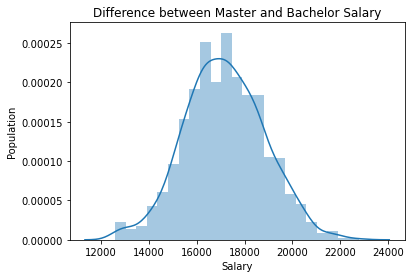

In [31]:
#Plot distribution of difference in means
bamean = np.array(b_mean) #transfer list to array for difference calculation
mamean = np.array(m_mean)
domean = np.array(d_mean)

sns.distplot(x = mamean-bamean)
plt.xlabel('Salary')
plt.ylabel('Population')
plt.title('Difference between Master and Bachelor Salary')

Text(0.5, 1.0, 'Difference between Doctor and Master Salary')

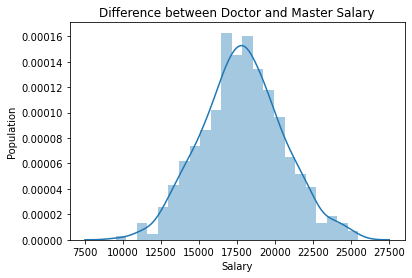

In [32]:
sns.distplot(x = domean-mamean)
plt.xlabel('Salary')
plt.ylabel('Population')
plt.title('Difference between Doctor and Master Salary')

Text(0.5, 1.0, 'Difference between Doctor and Bachelor Salary')

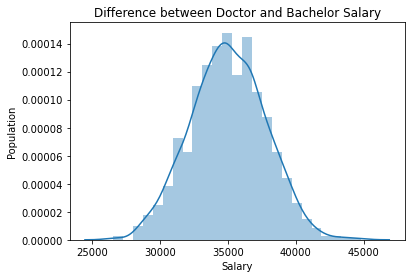

In [33]:
sns.distplot(x = domean-bamean)
plt.xlabel('Salary')
plt.ylabel('Population')
plt.title('Difference between Doctor and Bachelor Salary')

In [34]:
#ANOVA for bootstrapped data
stats.f_oneway(b_mean,m_mean,d_mean)

# H。: mu1=mu2=mu3 (three population means are equal)
#Given F-statistic of 104628.1145 and p-value of 0.0, p-value is less than 0.05, we reject the null hypotheses.
#Conclision: the mean values of these three groups are not equal.

F_onewayResult(statistic=104628.11453376214, pvalue=0.0)